# Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Loading Dataset

In [16]:
df = pd.read_csv('C:/Users/admin/Desktop/Hubblemind/Stock Market Dataset.csv')
df

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650,...,589498.0,10580,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690,...,581600.0,9780,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480,...,578020.0,9720,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130,...,584680.0,9750,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230,...,578800.0,13850,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230,...,300771.0,240,347.57,7560000,79.41,113150000,167.33,12560000,1318.5,150610.0
1239,1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360,...,302813.0,240,344.71,7860000,80.72,92530000,166.38,17520000,1314.2,166760.0
1240,1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210,...,308810.0,120,352.19,6720000,82.01,78800000,170.49,13280000,1314.4,137250.0
1241,1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950,...,310700.0,360,355.81,9050000,82.94,89060000,171.16,22560000,1319.2,129010.0


# Displaying the first few rows to understand its structure

In [17]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650,...,589498.0,10580,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690,...,581600.0,9780,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480,...,578020.0,9720,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130,...,584680.0,9750,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230,...,578800.0,13850,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,1780.0


# Checking datatypes,missing values, and basic statistics

In [18]:
df.columns

Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')

In [19]:
df.dtypes

Unnamed: 0             int64
Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price        float64
Bitcoin_Vol.           int64
Platinum_Price        object
Platinum_Vol.        float64
Ethereum_Price       float64
Ethereum_Vol.          int64
S&P_500_Price        float64
Nasdaq_100_Price     float64
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.             int64
Tesla_Price          float64
Tesla_Vol.             int64
Microsoft_Price      float64
Microsoft_Vol.         int64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.            int64
Nvidia_Price         float64
Nvidia_Vol.            int64
Berkshire_Price      float64
Berkshire_Vol.         int64
Netflix_Price        float64
Netflix_Vol.           int64
Amazon_Price         float64
Amazon_Vol.   

In [20]:
missing_values = df.isnull()
print(missing_values)

      Unnamed: 0   Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0          False  False              False              True            False   
1          False  False              False             False            False   
2          False  False              False             False            False   
3          False  False              False             False            False   
4          False  False              False             False            False   
...          ...    ...                ...               ...              ...   
1238       False  False              False             False            False   
1239       False  False              False             False            False   
1240       False  False              False             False            False   
1241       False  False              False             False            False   
1242       False  False              False             False            False   

      Crude_oil_Vol.  Coppe

In [21]:
df_dropped = df.dropna()
print(df_dropped)

     Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
28           28  21-12-2023              2.572           84550.0   
29           29  20-12-2023              2.447          125260.0   
30           30  19-12-2023              2.492          170440.0   
31           31  18-12-2023              2.503          154300.0   
32           32  15-12-2023              2.491          189240.0   
..          ...         ...                ...               ...   
863         863  07-08-2020              2.238          206250.0   
864         864  06-08-2020              2.165          161990.0   
865         865  05-08-2020              2.191          182430.0   
866         866  04-08-2020              2.193          230890.0   
867         867  03-08-2020              2.101          381970.0   

     Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  \
28             73.89        251980.0        3.9175      70080.0   
29             74.22        273360.0        3.906

# converting columns to specific data types

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [23]:
# Handle NaN values for integer columns
int_columns = [
    'Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 'Ethereum_Vol.', 'Microsoft_Vol.', 'Google_Vol.',
    'Platinum_Vol.', 'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.', 'Apple_Vol.', 'Tesla_Vol.', 'Nvidia_Vol.', 'Berkshire_Vol.',
    'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.'
]
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (float) first
    df[col] = df[col].fillna(0).astype(int)  # Replace NaN with 0 and then convert to int

# Handle NaN values for float columns
float_columns = [
    'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Apple_Price',
    'S&P_500_Price', 'Nasdaq_100_Price', 'Gold_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price',
    'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'
]
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (float) first
    df[col] = df[col].fillna(0)  # Replace NaN with 0

In [24]:
df.dtypes

Unnamed: 0                    int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.              int32
Crude_oil_Price             float64
Crude_oil_Vol.                int32
Copper_Price                float64
Copper_Vol.                   int32
Bitcoin_Price               float64
Bitcoin_Vol.                  int32
Platinum_Price              float64
Platinum_Vol.                 int32
Ethereum_Price              float64
Ethereum_Vol.                 int32
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.               int32
Apple_Price                 float64
Apple_Vol.                    int32
Tesla_Price                 float64
Tesla_Vol.                    int32
Microsoft_Price             float64
Microsoft_Vol.                int32
Silver_Price                float64
Silver_Vol.                   int32
Google_Price                float64
Google_Vol.                   int32
Nvidia_Price                

# Save the cleaned dataset

In [25]:
path = 'C:/Users/admin/Desktop/Hubblemind/Stock Market Cleaned.csv'
df.to_csv(path, index=False)

In [26]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-02-02,2.079,0,72.28,0,3.8215,0,43194.7,42650,...,589498.0,10580,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,0
1,1,2024-01-02,2.050,161340,73.82,577940,3.8535,0,43081.4,47690,...,581600.0,9780,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,260920
2,2,NaT,2.100,142860,75.85,344490,3.9060,0,42580.5,56480,...,578020.0,9720,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,238370
3,3,NaT,2.077,139750,77.82,347240,3.9110,0,42946.2,55130,...,584680.0,9750,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,214590
4,4,NaT,2.490,3590,76.78,331930,3.8790,0,43299.8,45230,...,578800.0,13850,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,1780


# Basic Statistics: Mean, Median, Std, Min, Max for key columns

In [27]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        print(f"\nBasic Statistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")
        print(f"Minimum Value: {df[col].min()}")
        print(f"Maximum Value: {df[col].max()}")


Basic Statistics for Unnamed: 0:
Mean: 621.0
Median: 621.0
Standard Deviation: 358.96750085023945
Minimum Value: 0
Maximum Value: 1242

Basic Statistics for Natural_Gas_Price:
Mean: 3.4947144006436046
Median: 2.702
Standard Deviation: 1.8225404695020653
Minimum Value: 1.482
Maximum Value: 9.647

Basic Statistics for Crude_oil_Price:
Mean: 67.57706355591311
Median: 69.23
Standard Deviation: 20.465500143430557
Minimum Value: -37.63
Maximum Value: 123.7

Basic Statistics for Copper_Price:
Mean: 3.5419565567176186
Median: 3.666
Standard Deviation: 0.7028187147883396
Minimum Value: 2.1005
Maximum Value: 4.9375

Basic Statistics for Bitcoin_Price:
Mean: 25241.90305711987
Median: 23055.1
Standard Deviation: 16029.009055226054
Minimum Value: 3397.7
Maximum Value: 67527.9

Basic Statistics for Platinum_Price:
Mean: 628.2886967015286
Median: 870.4
Standard Deviation: 418.80386496032656
Minimum Value: 0.0
Maximum Value: 999.8

Basic Statistics for Ethereum_Price:
Mean: 1445.815132743363
Median: 

# Exploratory Data Analysis (EDA)

 1. Visualize the Distribution of Target Variable (Amazon_Price)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


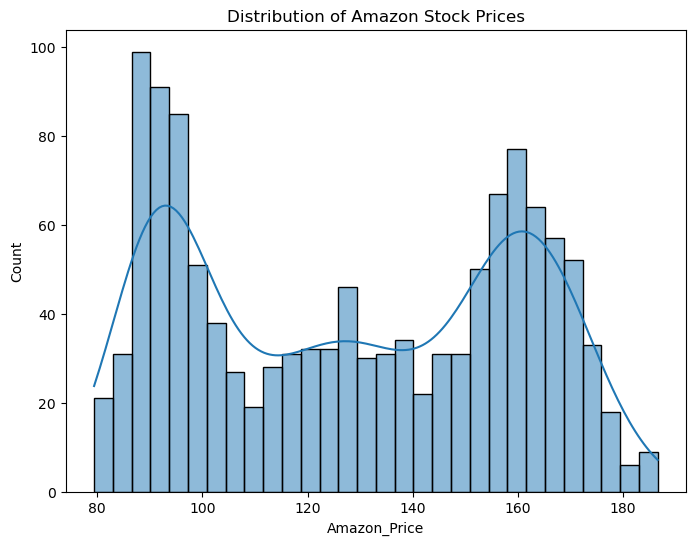

In [28]:
# Plotting the distribution of the target variable (Amazon_Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Amazon_Price'], kde=True, bins=30)
plt.title('Distribution of Amazon Stock Prices')
plt.show()

2. Analyzerelationships between Amazon_Price and other features using scatter plots

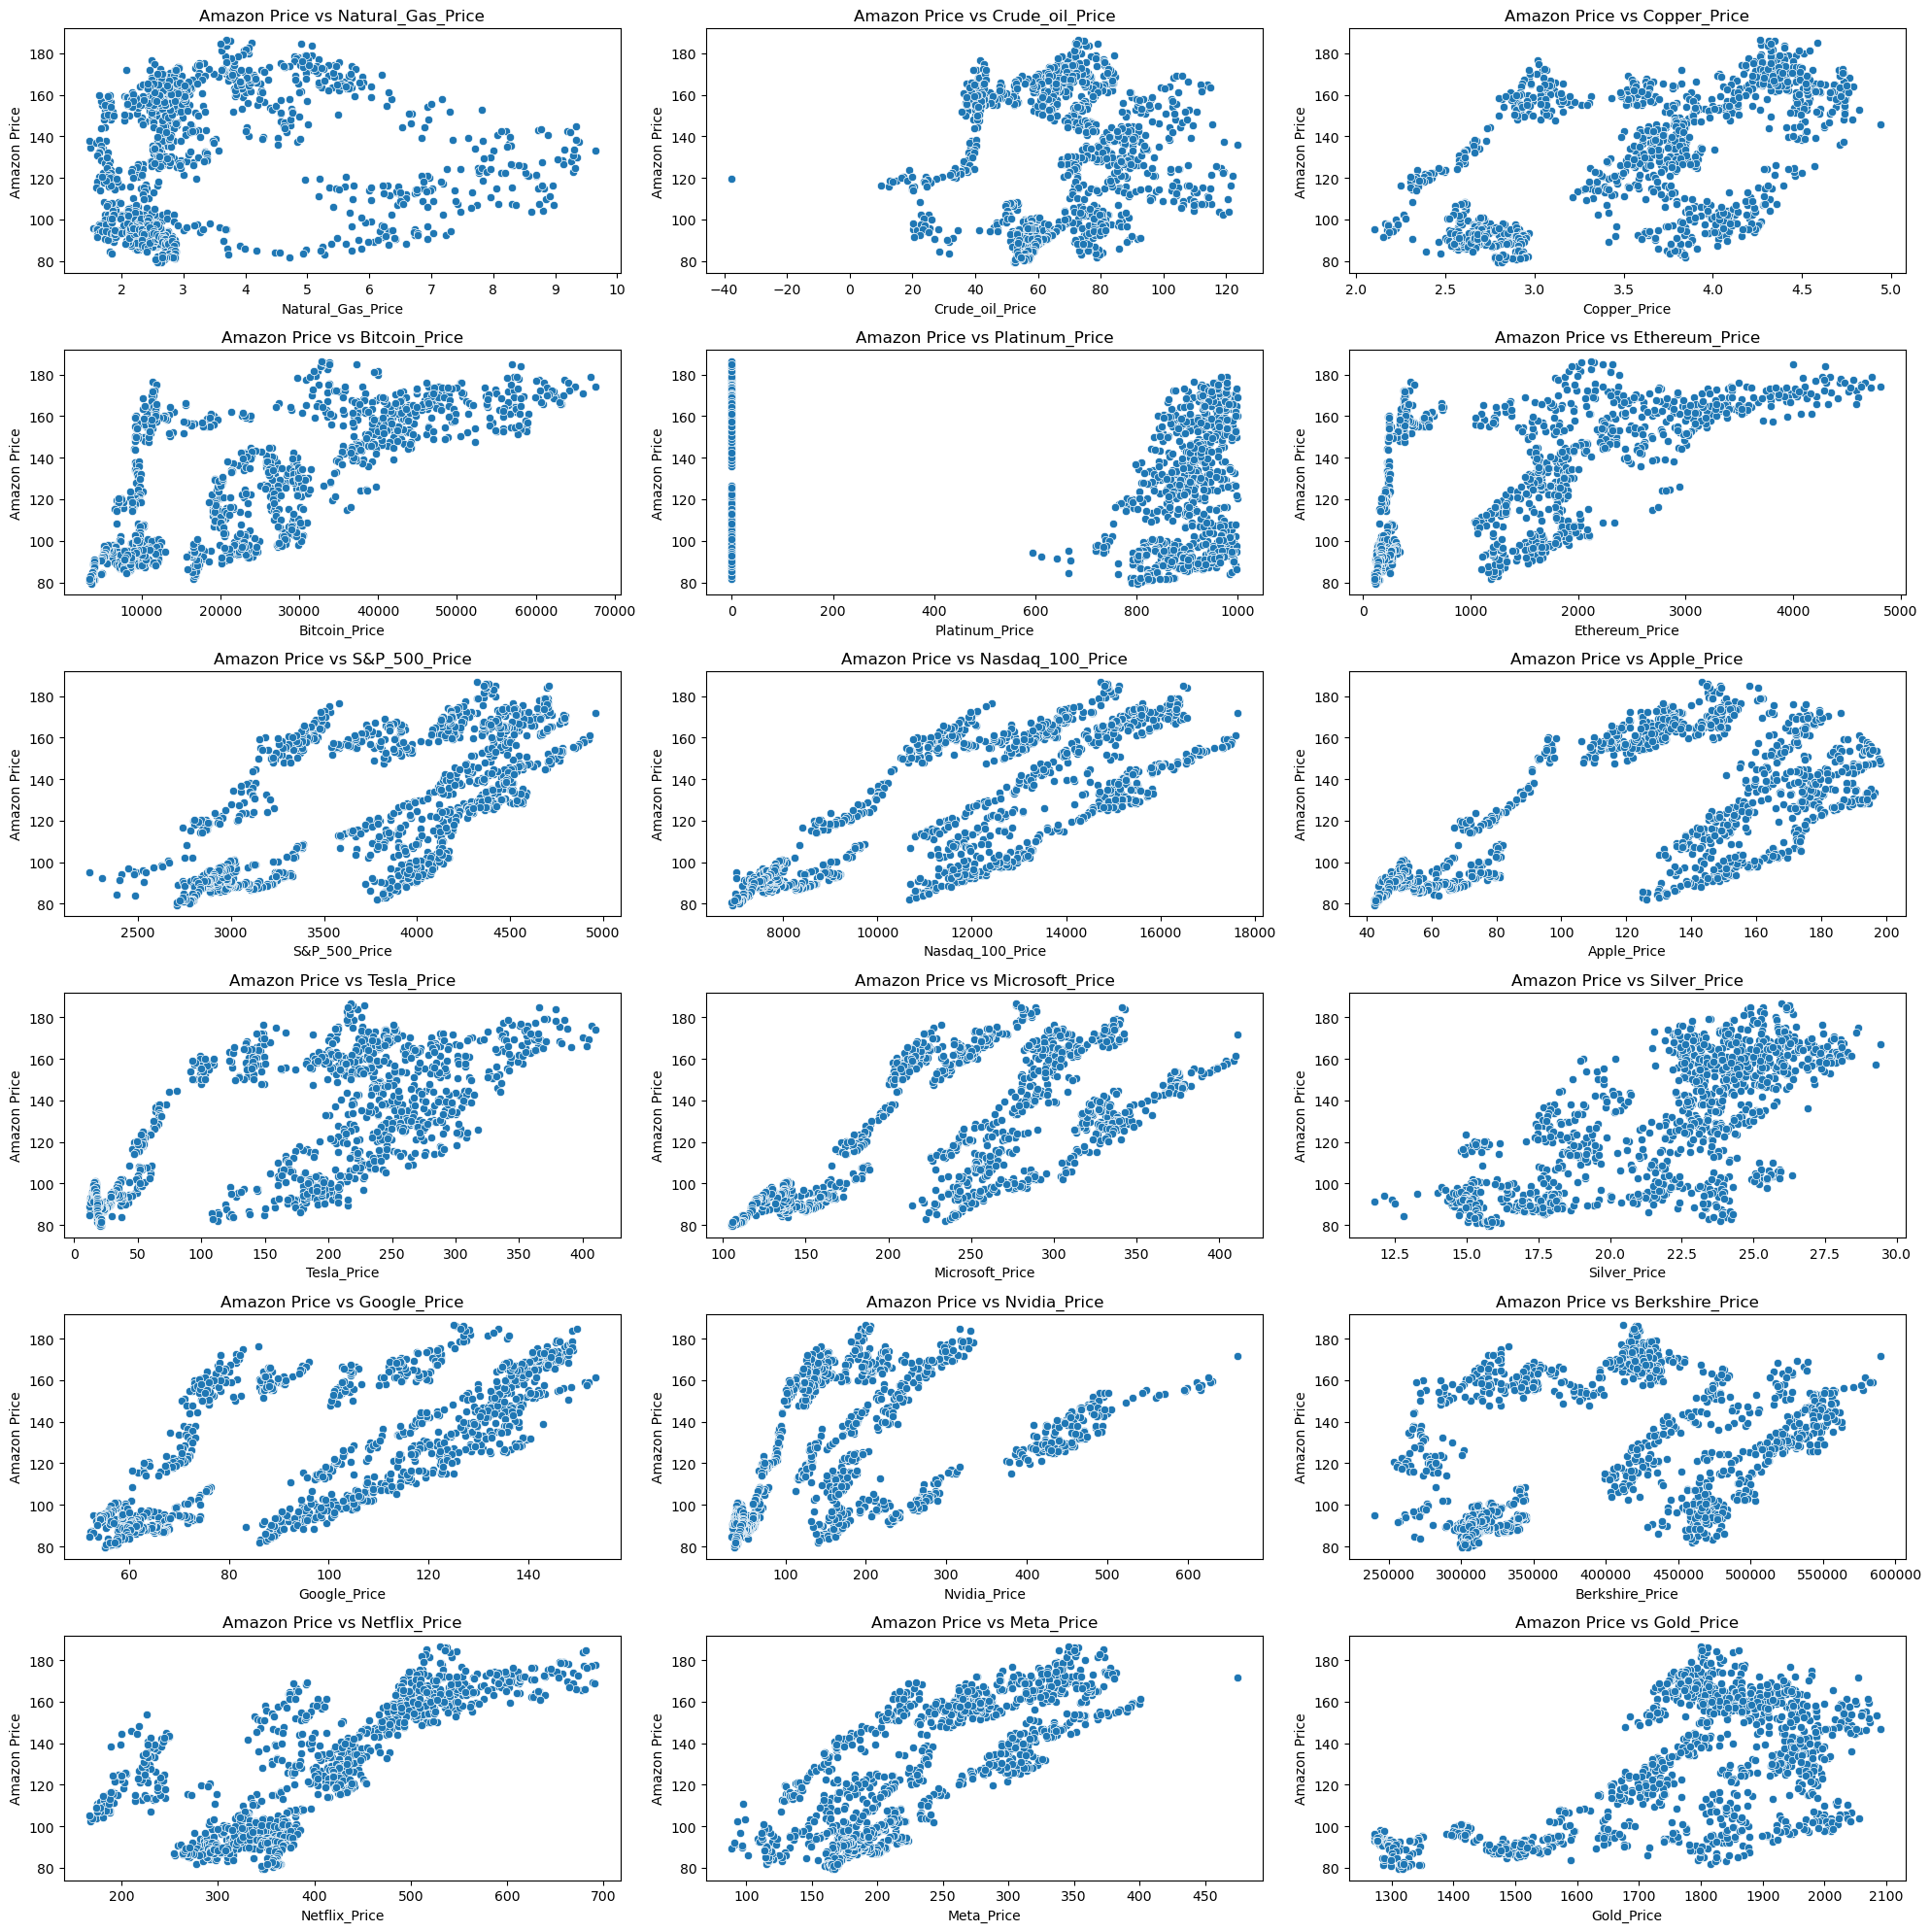

In [33]:
# List of all price features to compare with Amazon_Price
price_features = [
    'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
    'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
    'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price',
    'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
    'Meta_Price', 'Gold_Price'
]

# Set up the figure for multiple subplots
plt.figure(figsize=(20, 20))

# Loop through each price feature and create a scatter plot
for i, feature in enumerate(price_features, 1):
    plt.subplot(6, 3, i)  # 6 rows and 3 columns for scatter plots
    sns.scatterplot(x=df[feature], y=df['Amazon_Price'])
    plt.title(f'Amazon Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Amazon Price')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

3. Compute and visualize the correlation matrix

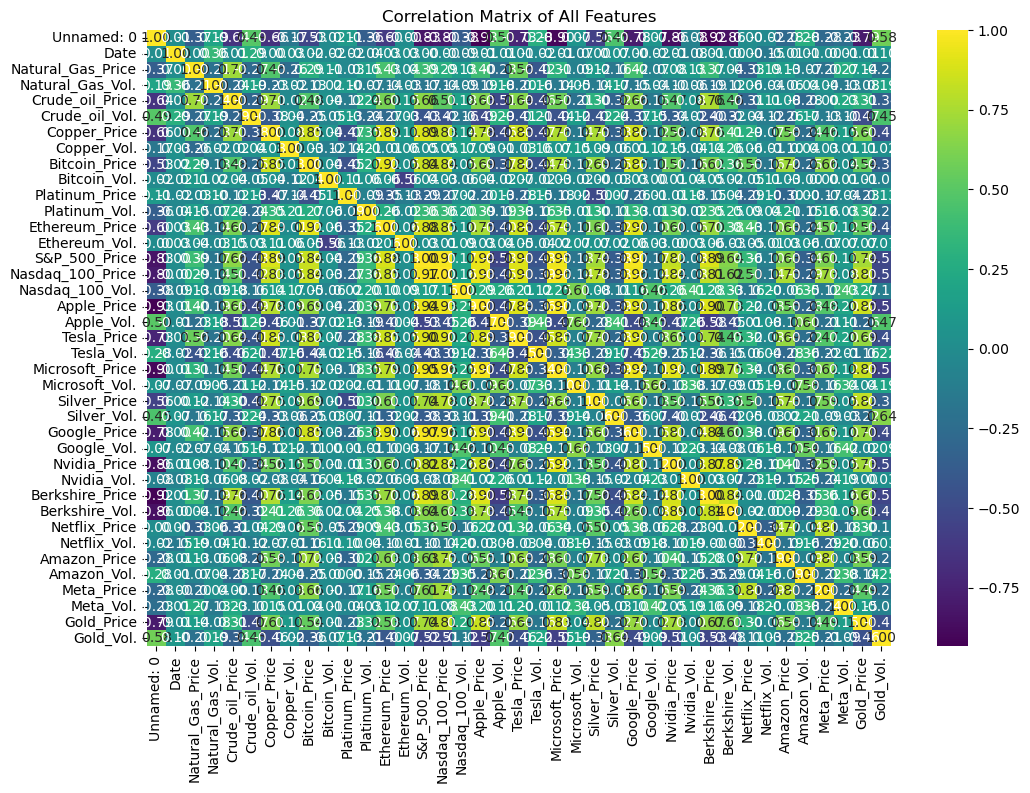

Correlation of features with Amazon Price:
 Amazon_Price         1.000000
Meta_Price           0.795618
Netflix_Price        0.770758
Nasdaq_100_Price     0.754037
Silver_Price         0.733125
Bitcoin_Price        0.716299
Tesla_Price          0.688165
Google_Price         0.665685
Ethereum_Price       0.632728
S&P_500_Price        0.630431
Microsoft_Price      0.599515
Gold_Price           0.592969
Copper_Price         0.579606
Apple_Price          0.552444
Nvidia_Price         0.407860
Berkshire_Price      0.279611
Platinum_Vol.        0.212082
Natural_Gas_Price    0.129552
Berkshire_Vol.       0.089812
Crude_oil_Price      0.082066
Ethereum_Vol.        0.034377
Bitcoin_Vol.         0.028546
Silver_Vol.          0.017349
Date                -0.011394
Meta_Vol.           -0.034181
Natural_Gas_Vol.    -0.060228
Nasdaq_100_Vol.     -0.063795
Microsoft_Vol.      -0.074436
Amazon_Vol.         -0.088988
Copper_Vol.         -0.097781
Apple_Vol.          -0.100603
Google_Vol.         -0.102

In [35]:
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

# Display correlation values specifically for Amazon_Price
amazon_corr = corr_matrix['Amazon_Price'].sort_values(ascending=False)
print("Correlation of features with Amazon Price:\n", amazon_corr)

# Feature Engineering

 1. Handle missingvalues by filling them with the mean of the respective columns

In [36]:
# Fill missing values with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Amazon_Price', 'Date', 'Unnamed: 0'])  # Drop target and non-feature columns
y = df['Amazon_Price']

2. Standardize the features using StandardScaler.

In [37]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easier manipulation
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Model Development

1. Split the dataset into training and testing sets (80-20 split)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2. Train the Model

In [41]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 5.23
MSE: 43.83
RMSE: 6.62


# Model Validation and Testing

1. Cross-Validation
Perform 5-fold cross-validation to assess the model's performance

In [43]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5  # Convert MSE to RMSE

print(f'Cross-validated RMSE scores: {cv_rmse_scores}')
print(f'Mean RMSE from cross-validation: {cv_rmse_scores.mean():.2f}')
print(f'Standard deviation of RMSE from cross-validation: {cv_rmse_scores.std():.2f}')

Cross-validated RMSE scores: [11.42266464 43.73119828 37.73472694 24.28638516 17.81018426]
Mean RMSE from cross-validation: 27.00
Standard deviation of RMSE from cross-validation: 12.08


2. Test Model on Unseen Data
Calculate the mean and standard deviation of the cross-validation scores and predict on a recent portion of the testing data

In [44]:
# Use a portion of the testing data as recent data for validation
recent_data = X_test.head(int(len(X_test) * 0.2))  # Use 20% of the testing set
recent_predictions = model.predict(recent_data)

# Evaluate the recent data predictions
recent_mae = mean_absolute_error(y_test.head(int(len(y_test) * 0.2)), recent_predictions)
recent_rmse = mean_squared_error(y_test.head(int(len(y_test) * 0.2)), recent_predictions, squared=False)

print(f'Recent Data MAE: {recent_mae:.2f}')
print(f'Recent Data RMSE: {recent_rmse:.2f}')

Recent Data MAE: 5.52
Recent Data RMSE: 7.22


3. Feature Importance Analysis
Analyze the coefficients of the linear regression model to determine feature importance

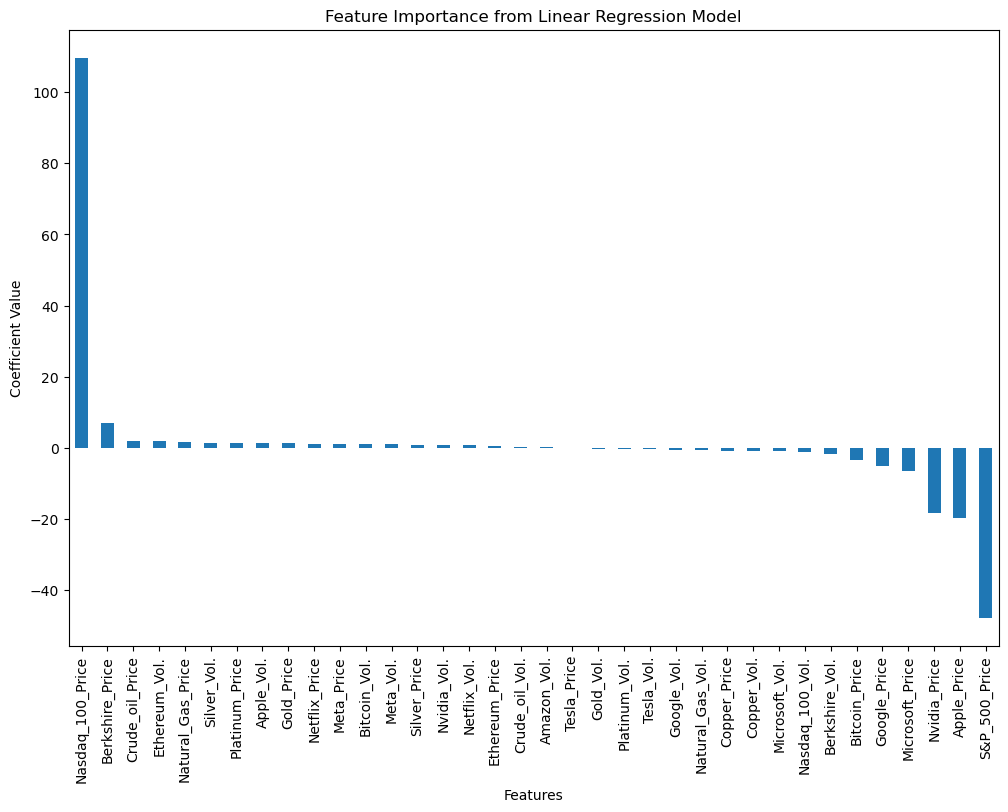

In [45]:
# Get feature importances (coefficients)
importance = model.coef_
feature_importance = pd.Series(importance, index=X.columns)

# Visualize the feature importances using a bar plot
plt.figure(figsize=(12, 8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance from Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()